<a href="https://colab.research.google.com/github/603021852-8/multivariate/blob/main/Multivariate_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ให้นักศึกษาทำข้อสอบใน Colab Notebook นี้โดยกรอกข้อมูลของตัวเองใน cell ที่ 2 แล้วรัน cell ที่ 1 - 5 และเริ่มทำข้อสอบใน cell ที่ 6 เป็นต้นไป

โดยโจทย์คือ
1. ข้อมูลโจทย์ อยู่ใน ตัวแปร ```Data```
2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ
3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ
4. เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.
5. เขียน comments อธิบายทุกขั้นตอน
6. อัด video อธิบาย code ทุกๆขั้นตอนรวมถึงผลแล้วอัพลง youtube ในรูปแบบ unlist 
7. commit โดยใช้ชื่อ commit เป็น link youtube ที่อธิบาย code ในข้อ 6.

กำหนดส่งวันที่ 2 พฤษภาคม 2564 (โดยให้มากรอกวันที่ commit ครั้งสุดท้ายใน sheet: https://docs.google.com/spreadsheets/d/1_qJwLDJVtOW1HxBcf_FHVc6UT4J_SOonuR6o3EEnVzw/edit?usp=sharing ช่อง Final)

In [ ]:
from sklearn.datasets import make_blobs
import random,math
import numpy as np
import pandas

In [ ]:
Name = 'กรกนก สังฆพันธ์'  #กำหนดตัวแปรเป็นชื่อและรหัสนักศึกษา
ID = '6030218528'

In [ ]:
def DataGenerator(name,id):
    random.seed(int(id[3:6]))
    numfeat = random.randint(20,30)
    ct = random.randint(len(name)-6,len(name))
    
    X, y = make_blobs(n_samples=10000, centers=ct, n_features=numfeat , random_state=int(id[3:6]))

    print(f'{id[3:6]}:{numfeat}:{ct}')
    X_t = (X[:,1]*2)+int(id[3])
    X_t2 = (X[:,-1]*5)+int(id[4])

    DT = np.append(X,X_t.reshape([10000,1]),axis=1)
    DT = np.append(DT,X_t2.reshape([10000,1]),axis=1)
    
    return pandas.DataFrame(DT)

In [ ]:
Data = DataGenerator(Name,ID)

021:22:12


In [ ]:
Data  #แสดงข้อมูล

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,-8.590591,-3.384560,6.182718,-10.013727,-3.798767,-10.386514,-4.951959,4.412683,-4.209981,2.053323,-9.436627,7.189614,-7.128790,-6.411139,-1.171090,8.044543,4.895843,9.009631,5.613588,-2.318265,-2.903407,3.881669,-6.769120,21.408343
1,-1.780529,-4.050530,5.651998,-2.922966,-5.314078,-3.230391,4.816577,-4.308441,-5.471005,7.333923,1.486305,4.574943,8.483905,-3.641024,2.156536,-7.497718,8.401389,5.533454,2.371273,-5.433469,9.923802,-8.043338,-8.101059,-38.216691
2,-1.317042,-5.234922,5.785962,-2.759441,-4.191934,-1.691788,4.471417,-6.076208,-6.237195,7.449835,1.632279,4.951774,9.081778,-6.340779,1.470355,-5.382698,9.529785,6.343260,4.176402,-5.876628,9.225844,-9.399084,-10.469844,-44.995422
3,-2.890972,7.835401,8.801621,5.784255,1.195772,-6.683487,-4.455486,-4.591505,-2.522932,-0.802568,1.440209,-7.198531,5.487459,5.718287,5.860904,-3.967740,3.116904,3.084671,-2.715012,-1.836151,8.548597,0.524378,15.670803,4.621891
4,0.696475,-5.034636,5.928600,-5.211910,-6.003475,-1.638056,2.014188,-5.219334,-4.721540,8.374975,-0.454258,5.993044,7.062063,-4.993895,-0.792897,-6.587069,7.754338,5.317533,2.988931,-5.168134,9.749888,-9.344624,-10.069272,-44.723122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-7.578964,-3.595504,5.054173,-9.940088,-7.124007,-8.085441,-2.769145,2.588654,-5.477224,-0.194023,-8.711575,9.566052,-5.875453,-8.826926,-0.212664,6.717171,4.442475,8.913906,3.078284,-2.253711,-0.051820,3.362835,-7.191008,18.814176
9996,-6.233917,6.662471,8.533216,6.878110,0.480179,-5.905370,-5.053298,-3.598717,-3.335469,-1.148128,2.537946,-4.728113,5.028287,2.578534,8.117830,-4.211865,3.209944,4.391970,-2.225402,0.004109,5.442513,3.070636,13.324941,17.353181
9997,9.641212,-5.273755,-5.130493,6.274294,-4.651740,3.422169,8.745878,-7.716951,5.570299,-10.243794,-0.618124,-2.897298,4.748631,4.693753,-8.963484,-6.874213,1.495819,3.947954,-7.892559,1.745546,-5.095021,-0.374443,-10.547509,0.127783
9998,-1.583269,3.391245,-3.536525,2.780576,-0.937440,-7.751907,9.043572,-2.629062,-7.243474,-9.298432,-0.461757,-6.511084,4.468788,-7.858024,-10.332272,-7.718783,5.525522,3.399530,5.189234,7.473903,-6.619214,-0.209460,6.782490,0.952698


In [ ]:
Data.shape #ดูขนาดของข้อมูล Data ก่อน

(10000, 24)

In [ ]:
corr.shape #ดูขนาดของ corrcoef ของ Data

(24, 24)

In [ ]:
corr #ใช้คำสั่งแสดงสหสัมพันธ์

array([[ 1.        ,  0.14911094,  0.03266964,  0.18320093,  0.06517606,
         0.43818779, -0.02000149, -0.05451777,  0.23419011, -0.18661214,
        -0.03510231, -0.32496401, -0.08330082,  0.37136865, -0.01996483,
        -0.46460386, -0.32500807, -0.10949574, -0.23140988, -0.28760948,
        -0.37872802, -0.07320836,  0.14911094, -0.07320836],
       [ 0.14911094,  1.        ,  0.19428863,  0.05064928,  0.37842665,
        -0.09678552, -0.68926997,  0.61033302, -0.24541403,  0.14609097,
        -0.39663264, -0.33803924,  0.03679069, -0.07351972,  0.14751492,
        -0.38904241, -0.55174356, -0.0402635 , -0.30709536,  0.07700145,
        -0.16039503,  0.34906782,  1.        ,  0.34906782],
       [ 0.03266964,  0.19428863,  1.        , -0.24966878, -0.24186736,
        -0.50957457, -0.37633118,  0.28202027, -0.50874918,  0.37296143,
        -0.3568447 , -0.11127014, -0.2107758 , -0.06805245,  0.35355515,
        -0.22233773, -0.17689113,  0.4512118 ,  0.22946833, -0.54880941,
  

In [ ]:
for i in range(corr.shape[0]):  #ใช้คำสั่งวนลูปเพื่อดูค่าที่ซ้ำกัน
    for j in range(corr.shape[1]):
        if (i !=j) and (corr[i,j] == 1.):
            print(f'column = {i}<=> column = {j} corrcoef = {corr[i,j]}')


column = 1<=> column = 22 corrcoef = 1.0
column = 22<=> column = 1 corrcoef = 1.0


จาก output แสดงว่ามีข้อมูลที่ซ้ำกัน จึงต้องนำข้อมูลออก

In [ ]:
newdata = Data.iloc[1:,:21] #ตัดข้อมูลให้เหลือเท่าที่ต้องการใช้

In [ ]:
newdata

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
1,-1.780529,-4.050530,5.651998,-2.922966,-5.314078,-3.230391,4.816577,-4.308441,-5.471005,7.333923,1.486305,4.574943,8.483905,-3.641024,2.156536,-7.497718,8.401389,5.533454,2.371273,-5.433469,9.923802
2,-1.317042,-5.234922,5.785962,-2.759441,-4.191934,-1.691788,4.471417,-6.076208,-6.237195,7.449835,1.632279,4.951774,9.081778,-6.340779,1.470355,-5.382698,9.529785,6.343260,4.176402,-5.876628,9.225844
3,-2.890972,7.835401,8.801621,5.784255,1.195772,-6.683487,-4.455486,-4.591505,-2.522932,-0.802568,1.440209,-7.198531,5.487459,5.718287,5.860904,-3.967740,3.116904,3.084671,-2.715012,-1.836151,8.548597
4,0.696475,-5.034636,5.928600,-5.211910,-6.003475,-1.638056,2.014188,-5.219334,-4.721540,8.374975,-0.454258,5.993044,7.062063,-4.993895,-0.792897,-6.587069,7.754338,5.317533,2.988931,-5.168134,9.749888
5,-2.895300,4.160251,-3.479245,0.945160,-0.370842,-5.163504,6.043561,-2.058205,-8.513994,-10.532100,-1.805278,-8.222496,4.984712,-8.543486,-9.972752,-8.953371,6.147277,2.306511,8.909060,6.479859,-6.536625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-7.578964,-3.595504,5.054173,-9.940088,-7.124007,-8.085441,-2.769145,2.588654,-5.477224,-0.194023,-8.711575,9.566052,-5.875453,-8.826926,-0.212664,6.717171,4.442475,8.913906,3.078284,-2.253711,-0.051820
9996,-6.233917,6.662471,8.533216,6.878110,0.480179,-5.905370,-5.053298,-3.598717,-3.335469,-1.148128,2.537946,-4.728113,5.028287,2.578534,8.117830,-4.211865,3.209944,4.391970,-2.225402,0.004109,5.442513
9997,9.641212,-5.273755,-5.130493,6.274294,-4.651740,3.422169,8.745878,-7.716951,5.570299,-10.243794,-0.618124,-2.897298,4.748631,4.693753,-8.963484,-6.874213,1.495819,3.947954,-7.892559,1.745546,-5.095021
9998,-1.583269,3.391245,-3.536525,2.780576,-0.937440,-7.751907,9.043572,-2.629062,-7.243474,-9.298432,-0.461757,-6.511084,4.468788,-7.858024,-10.332272,-7.718783,5.525522,3.399530,5.189234,7.473903,-6.619214


##2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ

###Import

In [ ]:
from sklearn.cluster import KMeans  #Import ทำการ import function ที่ต้องการใช้ในการทำ K-mean จาก sklearn.cluster

###Define

In [ ]:
kmeans = KMeans(random_state=2021)
            #Defind ทำการกำหนดค่า k ที่เราต้องการ  
            #กำหนดค่า k ที่ต้องการ (ไม่จำเป็นต้องกำหนดก็ได้ เพราะkmeanมีdefult)
            #random_state=2021 ให้ทุกคนเริ่มสุ่มที่จุดเดียวกัน จะได้มีการจัดกลุ่มเหมือนกัน

###คำนวณหาจุด cluter centers ของข้อมูล newdata ด้วยวิธี K-means clustering

In [ ]:
kmeans.fit(Data)##คำนวณหาจุด cluter centers ของข้อมูล example_df_drop ด้วยวิธี K-means clustering

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2021, tol=0.0001, verbose=0)

###ทำสอบการจัดกลุ่มของ Data

In [ ]:
#ทดสอบการจัดกลุ่มของ Data
y = kmeans.predict(Data)    #กำหนดให้ข้อมูลที่ทำการจัดกลุ่มเป็น y 
y

array([5, 0, 0, ..., 2, 2, 1], dtype=int32)

###ทำ PCA ลด Dimention

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  #กำหนดค่า Dimension=2

new_pca = pca.fit_transform(newdata)

In [ ]:
from matplotlib import pyplot as plt

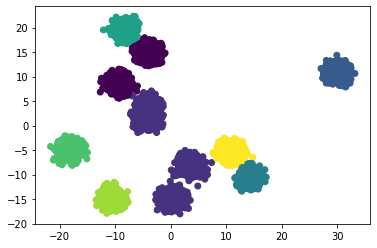

In [ ]:
kmeans = KMeans(random_state=2021) #ไม่ได้กำหนดกลุ่มในการแบ่งกลุ่ม
kmeans.fit(newdata)
y = kmeans.predict(newdata)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y)

จากกราฟที่ได้ พบว่าข้อมูลถูกแบ่งออกเป็น 8 กลุ่ม


###ดูว่าค่า K ควรเป็นเท่าไหร่

Elbow Method

SSE

เพื่อดูความคลาดเคลื่อน

In [ ]:
kmeans.inertia_ 

1624844.8629647128

In [ ]:
SSE = list()
for k in [1,2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters = k , random_state = 2021)
    XX = kmeans.fit(Data)
    SSE.append(kmeans.inertia_)

In [ ]:
SSE #แสดงค่าSSE

[13879602.78433308,
 9122631.046205603,
 7422139.144649109,
 6063062.142322729,
 4836369.819693639,
 3974830.28557136,
 3151727.1785474457,
 2500806.4740088503]

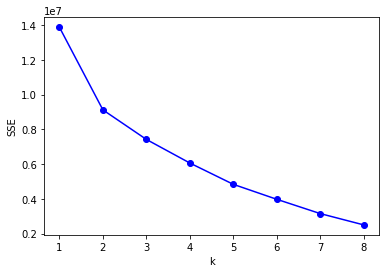

In [ ]:
plt.plot([1,2,3,4,5,6,7,8],SSE,'o-b')  #ทำการนำค่า SSE ที่ได้มา plot กราฟเพื่อดูว่ามีกี่ k กลุ่ม
plt.xlabel('k')
plt.ylabel('SSE');

จากกราฟจะบอกได้ว่า k มีทั้งหมด 4 กลุ่ม ดูจากจุดที่ k ที่ 3เริ่มมีความแตกต่างของระยะห่างระหว่างจุดที่ใกล้กัน

###หาค่า k ด้วยวิธี " The silhouette coefficient

In [ ]:
from sklearn import metrics #import function metrics มาใช้

In [ ]:
SilH = list()
for k in [2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters=k, random_state=2021)
    kmeans.fit(Data)
    score = metrics.silhouette_score(Data,kmeans.labels_)
    SilH.append(score)

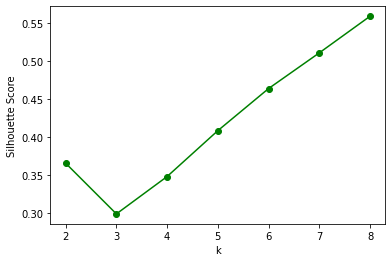

In [ ]:
plt.plot([2,3,4,5,6,7,8],SilH,'o-g')
plt.xlabel('k')
plt.ylabel('Silhouette Score');

จากกราฟจะบอกได้ว่า k มีทั้งหมด 3 กลุ่ม

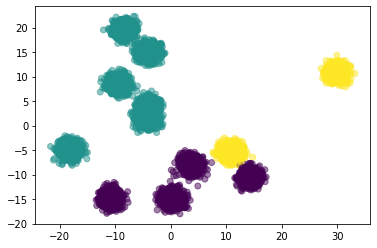

In [ ]:
kmeans = KMeans(n_clusters = 3,random_state=2021) #กำหนดกลุ่ม k = 3 ตามการหาค่า k ที่เหมาะสมข้างต้น
kmeans.fit(newdata)
y = kmeans.predict(newdata)  #กำหนดให้ข้อมูลที่ทำการจัดกลุ่มเป็น y
plt.scatter(new_pca[:,0],new_pca[:,1],c=y,alpha=0.5)

จากกราฟจะเห้นได้ว่า เมื่อจัดกลุ่ม k ให้เท่ากับ 3 กลุ่มแล้ว จะมีข้อมูลบางจำนวนที่ทับซ้อนกัน และะเห็นได้อีกว่าข้อมูลชุดนี้ปริมาณที่มาก

##3.ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ

##ทำMDS

In [ ]:
from sklearn.manifold import MDS

In [ ]:
mds = MDS(n_components=2) #กำหนดว่าเราจะใช้ components ของ mds เป็น 2

In [ ]:
new_mds = mds.fit_transform(Data) #กำหนดว่าเราจะใช้ components ของ mds เป็น 2

In [ ]:
new_mds.shape

(10000, 2)

In [ ]:
new_mds

##ทำ K-mean

In [ ]:
kmeans2 = KMeans(n_clusters = 3,random_state=2021) #กำหนดกลุ่ม k = 3 ตามการหาค่า k ที่เหมาะสมข้างต้น
kmeans2.fit(Data)
q = kmeans2.predict(Data) #กำหนดให้ข้อมูลที่ทำการจัดกลุ่มเป็น q

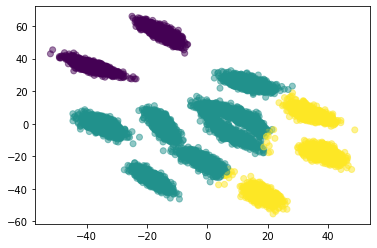

In [ ]:
plt.scatter(new_mds[:,0],new_mds[:,1],c=q,alpha=0.5)

จากการทำข้อ2 กับ ข้อ3 การลดจำนวน Dimension ของข้อมูล ให้ข้อมูลลด Dimension ก่อน แล้วทำการ clustering จึงทำให้แตกต่างกัน จากนั้นผลลัพธ์ออกมาจึงไม่เหมือนกัน

##4.เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.

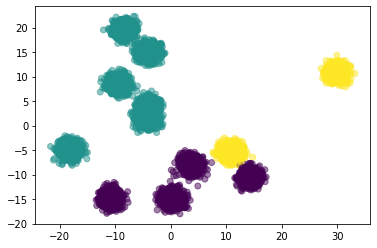

In [ ]:
kmeans = KMeans(n_clusters = 3,random_state=2021)   #กราฟในข้อ 2
kmeans.fit(newdata)
y = kmeans.predict(newdata)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y,alpha=0.5)

Text(0.5, 1.0, 'DataGenerator')

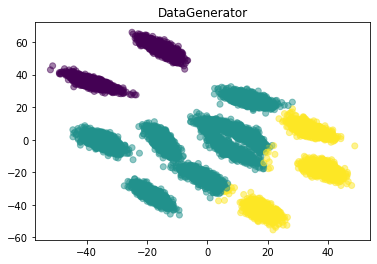

In [ ]:
plt.scatter(new_mds[:,0],new_mds[:,1],c=q,alpha=0.5)   #กราฟในข้อ 3
plt.title('DataGenerator')
